In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [6]:
def vis_classification(dataframe, no_features, first_feature, last_feature, line, location_line, subset, label_line):
    fig, axes = plt.subplots(subset, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        # Values for drawing lower and upper bound
        target = dataframe.iloc[:,i].values
        mu = dataframe.iloc[:,i+no_features].values
        sigma = dataframe.iloc[:,i+2*no_features].values
        lower_bound = mu - 2*sigma
        upper_bound = mu + 2* sigma
        
        # Values about appearance of anomaly 
        palette = []
        anomaly_label = dataframe.iloc[:, i+4*no_features+1].values
        if 0 in anomaly_label and 1 not in anomaly_label:
            palette = ["green"]
        elif 1 in anomaly_label and 0 not in anomaly_label:
            palette = ["red"]
        elif 0 in anomaly_label and 1 in anomaly_label:
            palette = ["green","red"]

        # Predicted mu
        sns.lineplot(data=dataframe, 
                     x=t, 
                     y=columns[i+no_features], 
                     ax=ax[i-first_feature],
                     color="black",
                     label="$\hat{y}$",
                     linewidth=.6)
        
        # Confidence bound (+- 2 sigma)
        ax[i-first_feature].fill_between(t, lower_bound, upper_bound, color="grey", alpha=0.5, label="Prediction Interval \n $(2\hat{\sigma})$")
        
        # Target values (actual sensor values)
        sns.scatterplot(data=dataframe, 
                        x=t, 
                        y=columns[i],
                        ax=ax[i-first_feature], 
                        hue=columns[i+4*no_features+1],
                        palette=palette,
                        s=15,
                        linewidth=.1)
        
        # Line for transition between phases     
        if line:
            ax[i-first_feature].axvline(location_line, 0,2, color="b", linestyle ="--", linewidth=1.5, label=label_line)
        
        # Set labels etc. 
        ax[i-first_feature].legend(loc='center left', 
                                   bbox_to_anchor=(1, 0.5),
                                   fancybox=True, 
                                   shadow=True, 
                                   ncol=1,
                                   prop={'size': 8})
        ax[i-first_feature].set_xlabel("time [in s]")
        ax[i-first_feature].set_ylabel("")
        ax[i-first_feature].set_title("Sensor No.{}".format(i))      

## Change of Degeneration Level

In [3]:
start_phase_1 = 22475
start_phase_2 = 36415

# Visualisation of Classification
## Phase 0 - no error

In [4]:
artifical_data = pd.read_csv("../../files/classification/MLE/cpps_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[:800,:]

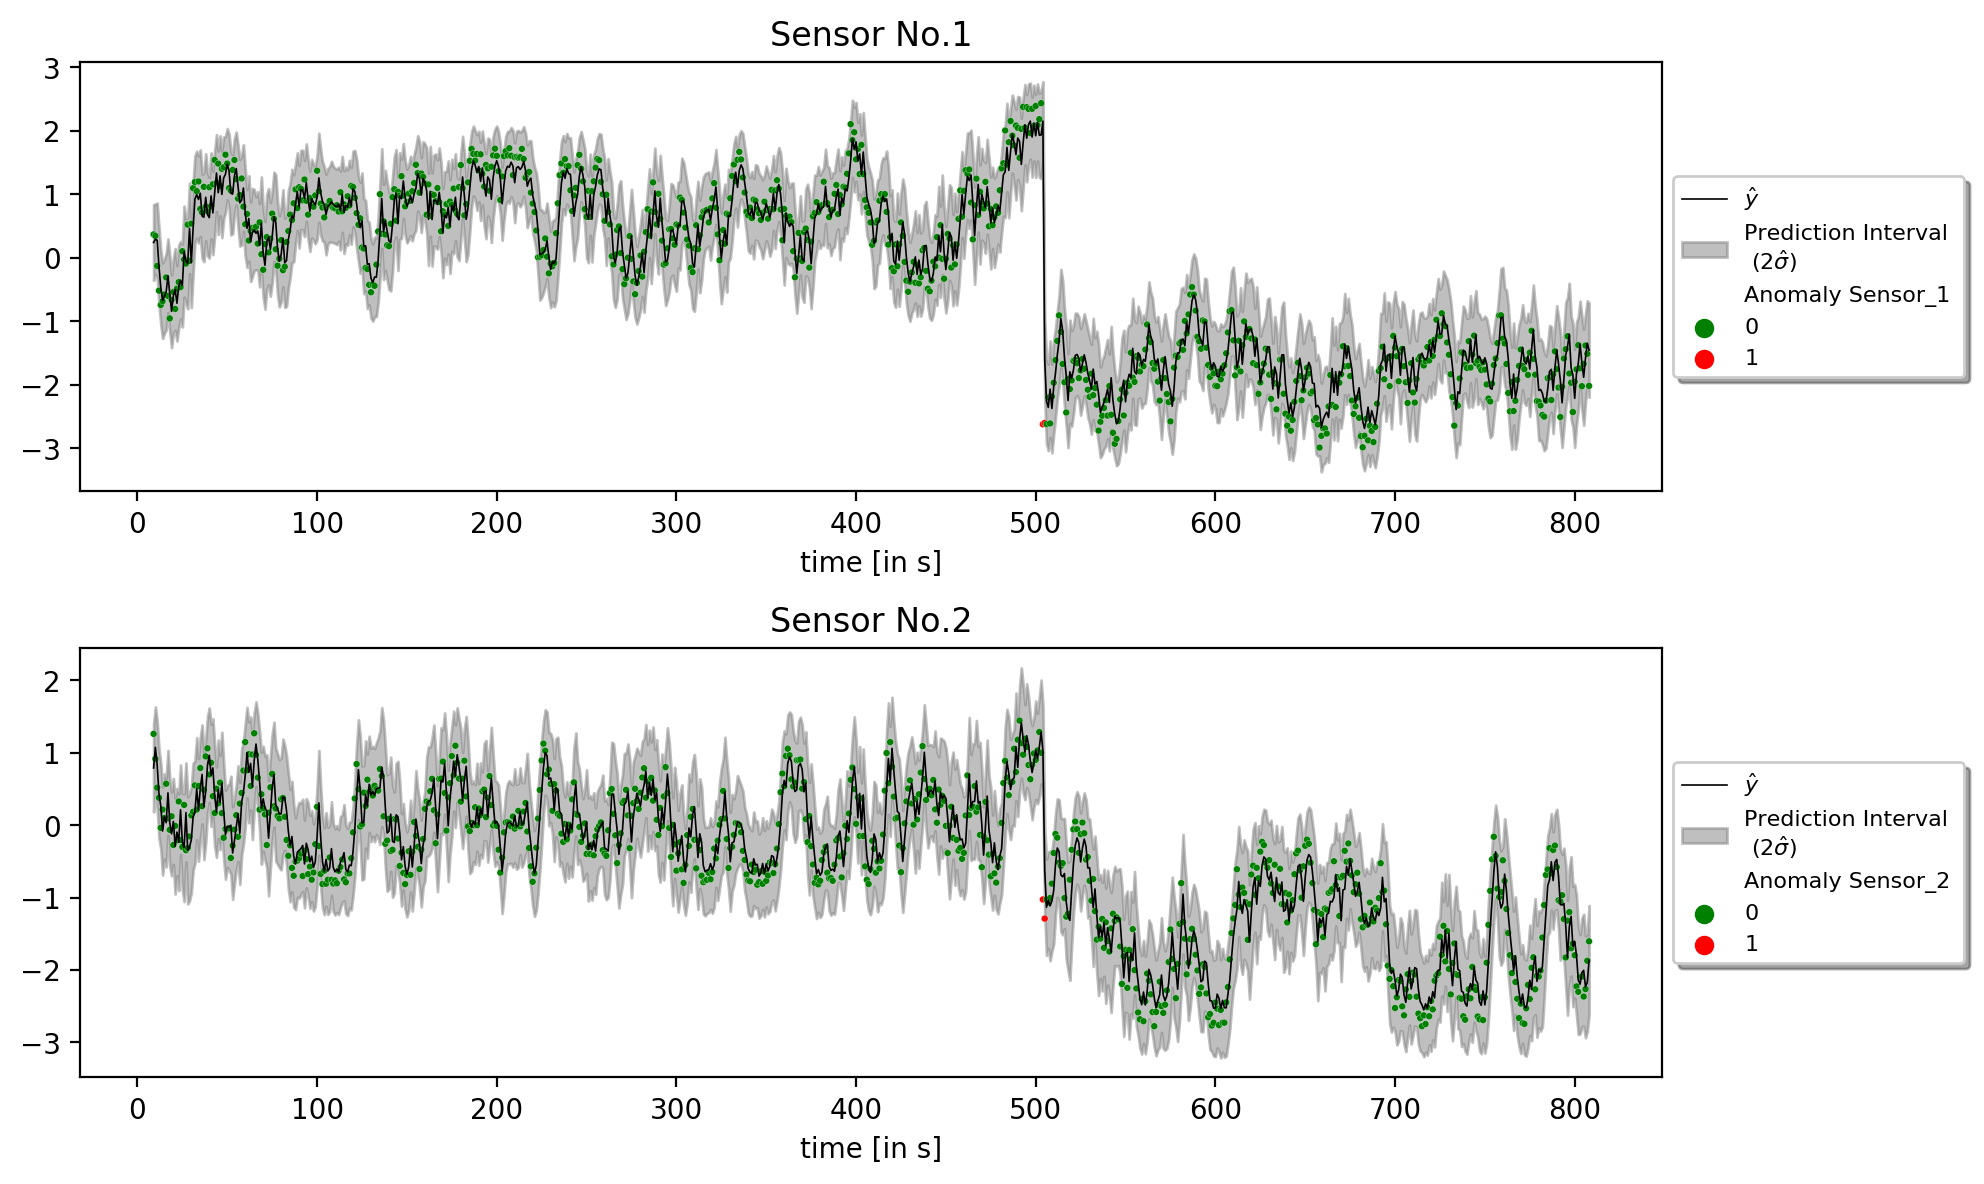

In [5]:
vis_classification(dataframe = artifical_data,
                   no_features=10, 
                   first_feature=1, 
                   last_feature=3,
                   line = False,
                   location_line = start_phase_1,
                   subset = 2,
                   label_line="")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_p0_cpps.png")
plt.show()

## Transistion from Phase 0 to Phase 1

In [8]:
artifical_data = pd.read_csv("../../files/classification/MLE/cpps_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_1-200:22900,:]

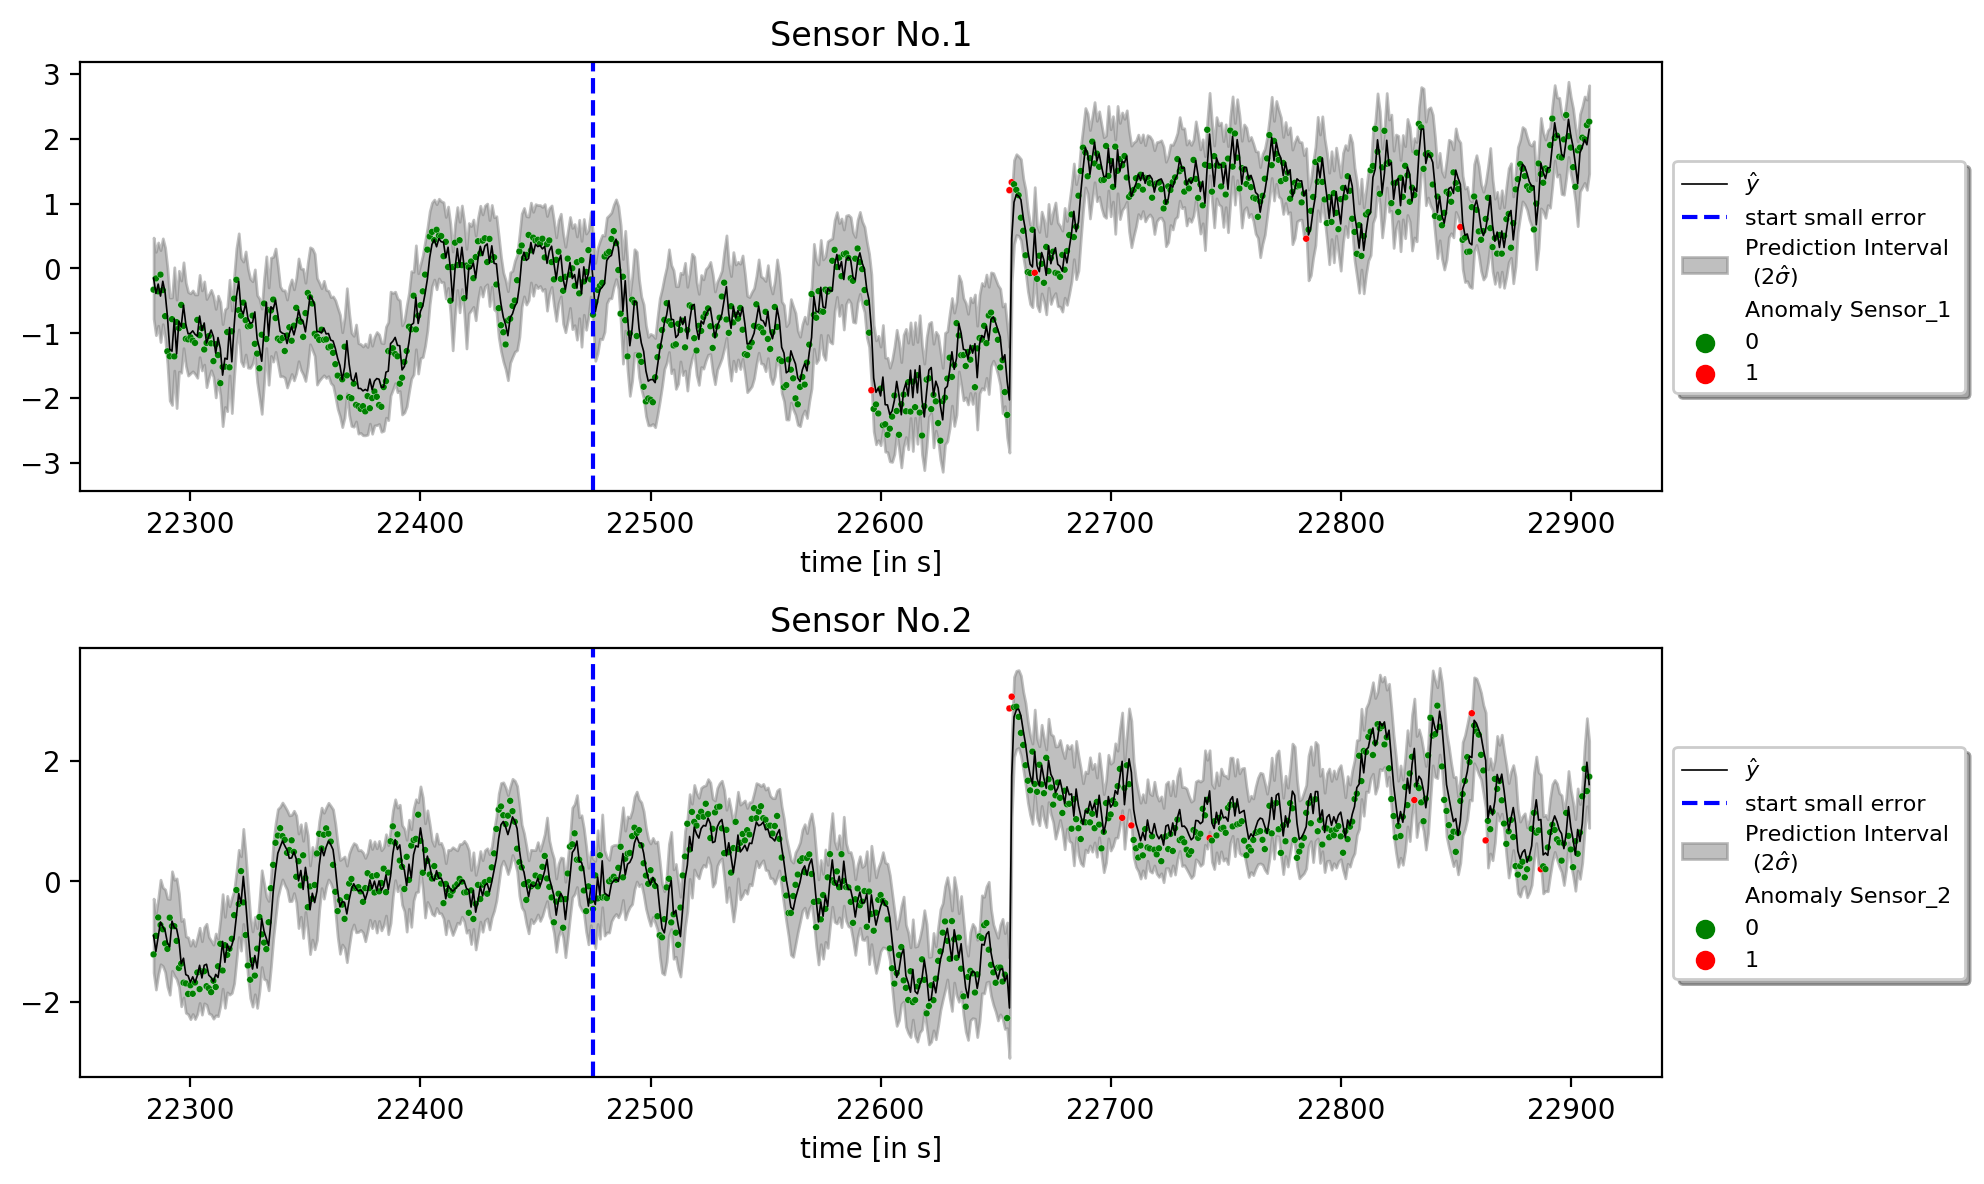

In [9]:
vis_classification(dataframe = artifical_data,
               no_features=10, 
               first_feature=1, 
               last_feature=3,
               line = True,
               location_line = start_phase_1,
               subset = 2,
               label_line="start small error")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_start1_cpps.png")
plt.show()

## Transistion from Phase 1 to Phase 2

In [10]:
artifical_data = pd.read_csv("../../files/classification/MLE/cpps_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_2-300:36800,:]

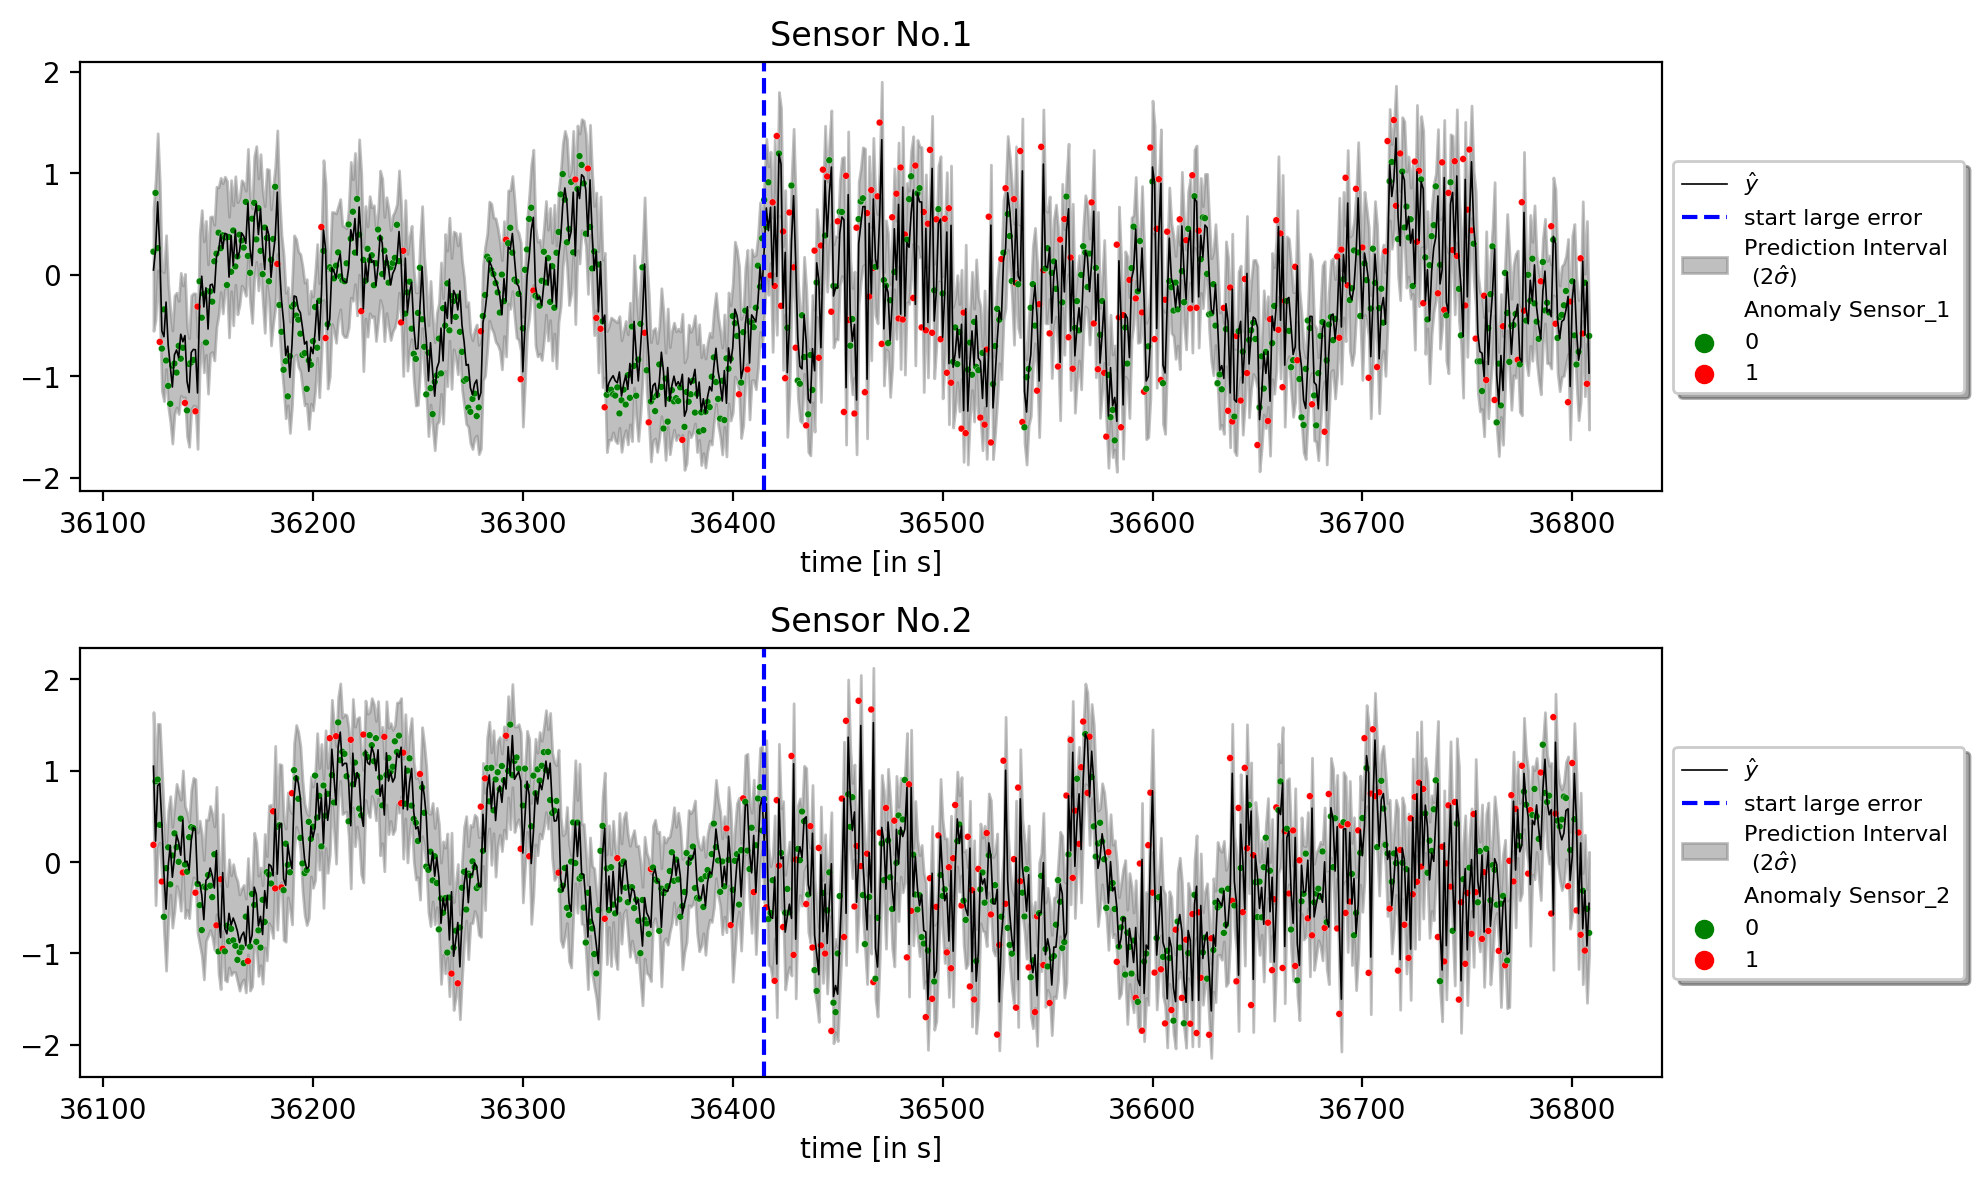

In [11]:
vis_classification(dataframe = artifical_data,
               no_features=10, 
               first_feature=1, 
               last_feature=3,
               line = True,
               location_line = start_phase_2,
               subset = 2,
               label_line="start large error")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_start2_cpps.png")
plt.show()

## Detail View

In [4]:
artifical_data = pd.read_csv("../../files/classification/MLE/cpps_2sigma.csv", sep=";")
artifical_data = artifical_data.iloc[start_phase_2-200:36500,:]

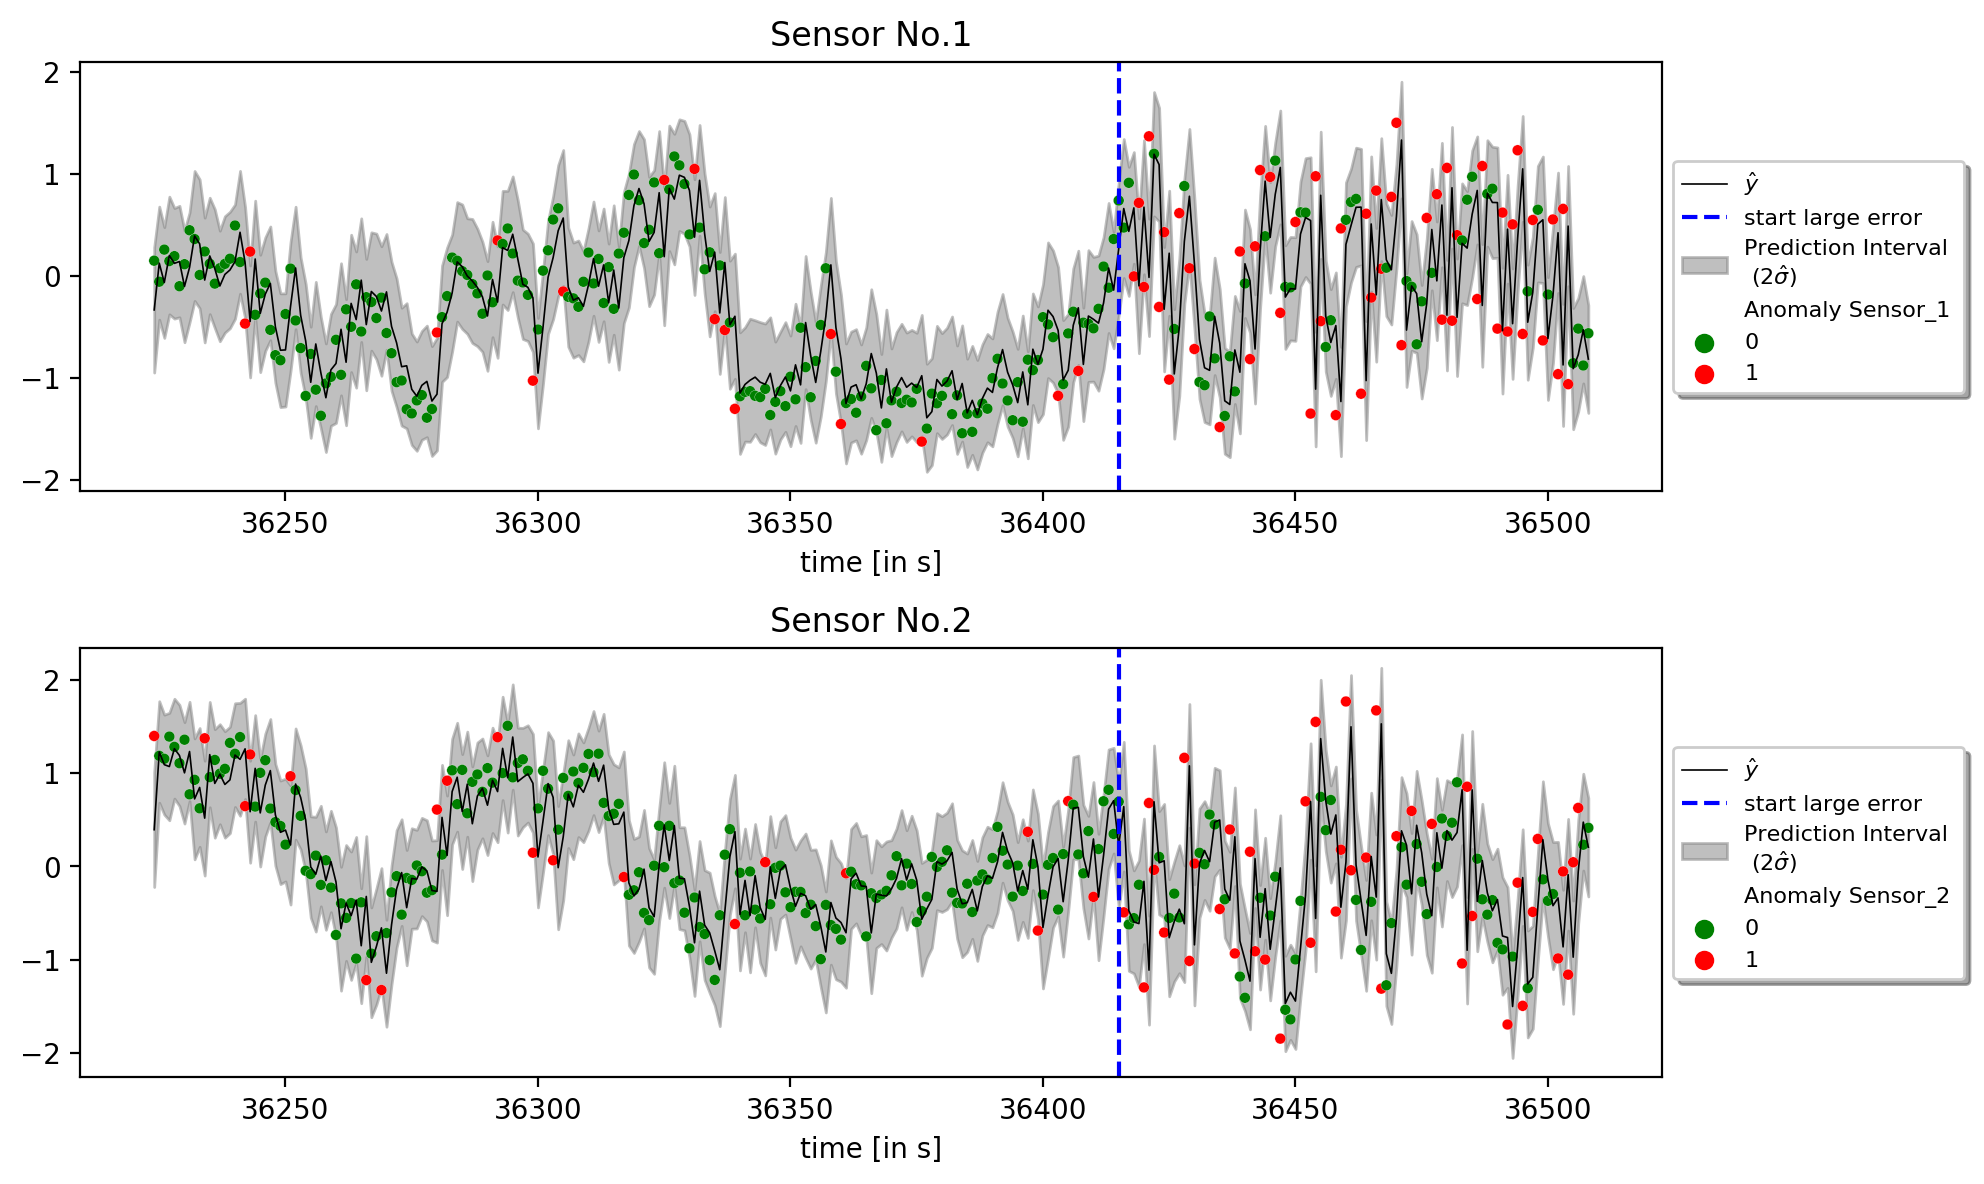

In [7]:
vis_classification(dataframe = artifical_data,
               no_features=10, 
               first_feature=1, 
               last_feature=3,
               line = True,
               location_line = start_phase_2,
               subset = 2,
               label_line="start large error")
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classfic_detail_cpps.png")
plt.show()